# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [14]:
from collections import deque
import time

from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
import torch

from dqn_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="C:\\Users\Hachi\PycharmProjects\gym\gym\envs\Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Implement and train an agent to the Environment

In [5]:
# Initialize our agent
seed=17
agent = Agent(state_size = state_size, action_size = action_size, seed = seed)

In [6]:
def dqn(n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
    This function is used to march through a defined number of epochs
    for navigating our environment.  Within an epoch, for each step, an action
    is chosen by our agent given the current state and then we determine from
    the environment our reward, next_state and whether the
    epoch is completed.  Within the step we then conducts 
    learning activities for the agent.
    
    :param n_episodes: (int) the number of epoches
    :param eps_start: (float) epsilon-greedy hyperparameter starting value
    :param eps_end:  (float) epsilon-greedy hyperparameter terminal value
    :param eps_end: (float) epsilon-greedy hyperparameter decay rate
    
    :return: (array_like) calculated scores for each epoch
     """
    scores = []
    scores_window = deque(maxlen=100)               # last 100 scores
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                      # initialize the score
        done = False
        while not done:
            action = agent.act(state, epsilon=eps)         # select an action
            env_info = env.step(action.item())[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
        scores.append(score)
        scores_window.append(score)
        eps = max(eps_end, eps_decay*eps)
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=20.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

Train our agent, showing incremental scores (averaged over prior 100 epochs), and then show a graph of our scores per epoch.

Episode 50	Average Score: -0.24
Episode 100	Average Score: -0.27
Episode 150	Average Score: 0.02
Episode 200	Average Score: 1.16
Episode 250	Average Score: 2.84
Episode 300	Average Score: 4.78
Episode 350	Average Score: 6.38
Episode 400	Average Score: 7.61
Episode 450	Average Score: 9.31
Episode 500	Average Score: 9.79
Episode 550	Average Score: 9.43
Episode 600	Average Score: 10.00
Episode 650	Average Score: 11.16
Episode 700	Average Score: 12.45
Episode 750	Average Score: 13.80
Episode 800	Average Score: 14.48
Episode 850	Average Score: 14.62
Episode 900	Average Score: 15.28
Episode 950	Average Score: 15.88
Episode 1000	Average Score: 16.04
Episode 1050	Average Score: 16.49
Episode 1100	Average Score: 16.93
Episode 1150	Average Score: 16.43
Episode 1200	Average Score: 16.41
Episode 1250	Average Score: 16.76
Episode 1300	Average Score: 16.61
Episode 1350	Average Score: 16.70
Episode 1400	Average Score: 16.76
Episode 1450	Average Score: 16.48
Episode 1500	Average Score: 16.36
Episode 1

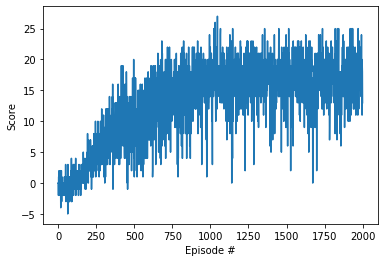

In [7]:
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

We can then use our trained agent to run through an iteration of the game to see how well it does and print out the net yellow bananas it captures.

In [8]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)         # select an action
    env_info = env.step(action.item())[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 18.0


By comparison, this is a runthrough of the environment by randomly selecting actions.

In [9]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: -1.0


Optional, extract our local q network model's trained weights as a serialized object

In [17]:
model_weights = agent.dqn_local.state_dict()
torch.save(model_weights, './trained/model_weights.pth')

When finished, you can close the environment.

In [10]:
env.close()